In [1]:
import time
start_time = time.time()
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from random import choices

In [2]:
def Dsq_init(df):
    centroid = data.sample()
    while centroid.shape[0]<6:
        min_dist = euclid_dist(df,centroid)
        prob = list()
        for i in range(df.shape[0]):
            prob.append((min_dist[i]**2)/np.sum(min_dist**2))
        #df["prob"] = prob
        id = choices(df.index.values.tolist(),prob)
        centroid = centroid.append(df.iloc[id,:])
    
    return centroid

In [3]:
def euclid_dist(df1,df2):
    dist_mat = np.zeros(shape = (df1.shape[0],df2.shape[0]))
    for id1,row1 in df1.iterrows():
        j = 0
        for id2,row2 in df2.iterrows():
            a = [row1["X"]-row2["X"],row1["Y"]-row2["Y"]]
            dist_mat[id1][j] =  np.linalg.norm(a)
            j += 1
    min_dist = dist_mat.min(axis=1)
    return min_dist



In [4]:
N=100
mean = np.matrix([[3,3],[0,3],[3,0],[0,0]])
data = np.matrix([[0,0]])
for i in range(mean.shape[0]):
    normal_2D = np.random.standard_normal((2,N))
    fin = normal_2D.T + mean[i]
    data = np.vstack([data,fin])

data.shape

(401, 2)

In [5]:
data = pd.DataFrame(data[1:,:], columns = ['X','Y'])

In [6]:
centres = Dsq_init(data)
rand_centres = data.sample(4)

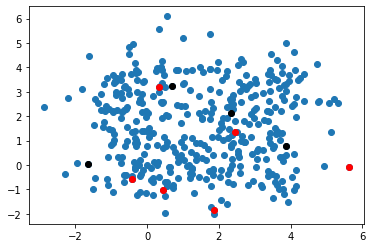

In [7]:
plt.scatter(data['X'],data['Y'])
plt.scatter(centres['X'],centres['Y'],c='r')
plt.scatter(rand_centres['X'],rand_centres['Y'],c='black')

In [8]:
def k_means_fit(X,centroids, n = 4):
    #get a copy of the original data
    X_data = X
    
    
    diff = 1
    j=0

    while(diff!=0):

        #creating a copy of the original dataframe
        i=1

        #iterate over each centroid point 
        for index1,row_c in centroids.iterrows():
            ED=[]

            #iterate over each data point
            for index2,row_d in X_data.iterrows():

                #calculate distance between current point and centroid
                d1=(row_c["X"]-row_d["X"])**2
                d2=(row_c["Y"]-row_d["Y"])**2
                d=np.sqrt(d1+d2)

                #append distance in a list 'ED'
                ED.append(d)

            #append distace for a centroid in original data frame
            X[i]=ED
            i=i+1

        C=[]
        for index,row in X.iterrows():

            #get distance from centroid of current data point
            min_dist=row[1]
            pos=1

            #loop to locate the closest centroid to current point
            for i in range(n):

                #if current distance is greater than that of other centroids
                if row[i+1] < min_dist:

                    #the smaller distanc becomes the minimum distance 
                    min_dist = row[i+1]
                    pos=i+1
            C.append(pos)

        #assigning the closest cluster to each data point
        X["Cluster"]=C

        #grouping each cluster by their mean value to create new centroids
        centroids_new = X.groupby(["Cluster"]).mean()[["Y","X"]]
        if j == 0:
            diff=1
            j=j+1

        else:
            #check if there is a difference between old and new centroids
            diff = (centroids_new['Y'] - centroids['Y']).sum() + (centroids_new['X'] - centroids['X']).sum()
            #print(diff.sum())

        centroids = X.groupby(["Cluster"]).mean()[["Y","X"]]
        
    return X, centroids


In [9]:

centroids = data.sample(4)
clustered, cent = k_means_fit(data,centroids, n= 4)
print(cent)

                Y         X
Cluster                    
1        0.154616  2.895580
2        0.114692  0.081108
3        3.070122 -0.248306
4        2.988498  3.019064


Text(0, 0.5, 'Y')

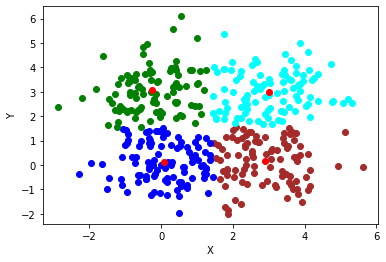

In [10]:
color=['brown','blue','green','cyan']

#plot data
for k in range(len(color)):
    cluster=clustered[clustered["Cluster"]==k+1]
    plt.scatter(cluster["X"],cluster["Y"],c=color[k])
    
#plot centroids    
plt.scatter(cent["X"],cent["Y"],c='red')
plt.xlabel('X')
plt.ylabel('Y')

In [11]:
centres = Dsq_init(data)
clustered, cent1 = k_means_fit(data,centres, n= 4)
print(cent1)

                Y         X
Cluster                    
1        0.147012  2.910349
2        0.096107  0.115767
3        2.988498  3.019064
4        3.037717 -0.263952


Text(0, 0.5, 'Y')

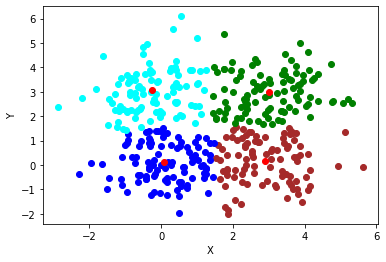

In [12]:
color=['brown','blue','green','cyan']

#plot data
for k in range(len(color)):
    cluster=clustered[clustered["Cluster"]==k+1]
    plt.scatter(cluster["X"],cluster["Y"],c=color[k])
    
#plot centroids    
plt.scatter(cent["X"],cent["Y"],c='red')
plt.xlabel('X')
plt.ylabel('Y')

In [13]:
data1 = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")
data1.rename(columns = {"Height": "X", "Weight": "Y"},inplace = True)

In [14]:
centroids = data1.sample(6)
clustered, cent = k_means_fit(data1,centroids, n= 6)
print(cent)

                  Y           X
Cluster                        
1         66.236842  155.723684
2        143.022222  155.888889
3         69.024390  184.231707
4        100.121951  155.756098
5        108.967391  183.858696
6        143.576923  183.500000


Text(0, 0.5, 'Y')

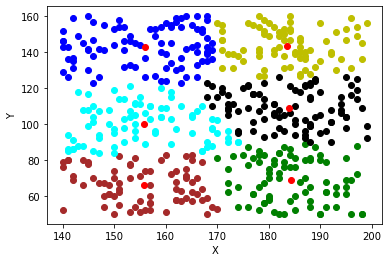

In [15]:
color=['brown','blue','green','cyan','black','y']

#plot data
for k in range(len(color)):
    cluster=clustered[clustered["Cluster"]==k+1]
    plt.scatter(cluster["X"],cluster["Y"],c=color[k])
    
#plot centroids    
plt.scatter(cent["X"],cent["Y"],c='red')
plt.xlabel('X')
plt.ylabel('Y')

In [16]:
centres = Dsq_init(data1)
clustered, cent1 = k_means_fit(data1,centres, n= 6)
print(cent1)

                  Y           X
Cluster                        
1        103.244681  182.776596
2         70.595506  154.460674
3        140.722892  184.927711
4         66.487179  183.564103
5        145.623529  156.752941
6        109.408451  155.676056


Text(0, 0.5, 'Y')

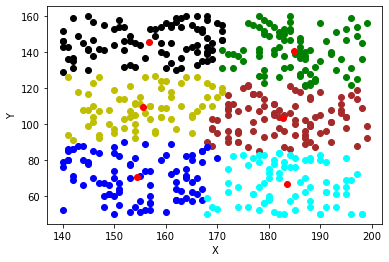

In [17]:
color=['brown','blue','green','cyan','black','y']

#plot data
for k in range(len(color)):
    cluster=clustered[clustered["Cluster"]==k+1]
    plt.scatter(cluster["X"],cluster["Y"],c=color[k])
    
#plot centroids    
plt.scatter(cent1["X"],cent1["Y"],c='red')
plt.xlabel('X')
plt.ylabel('Y')

In [18]:
np.sum(euclid_dist(data1,cent))


6210.514330880399

In [19]:
np.sum(euclid_dist(data1,cent1))

6195.41844773171

In [20]:
data = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")
data.rename(columns = {"Height": "X", "Weight": "Y"},inplace = True)

In [21]:
def k_means(data,k):
    # k = int(input("No, of Clusters: "))
    centroids = data.sample(k)
    clustered, cent = k_means_fit(data,centroids, k)
    
    color=['brown','blue','green','cyan','black','y']

    # #plot data
    # for k in range(len(color)):
    #     cluster=clustered[clustered["Cluster"]==k+1]
    #     plt.scatter(cluster["X"],cluster["Y"],c=color[k])
        
    # #plot centroids    
    # plt.scatter(cent["X"],cent["Y"],c='red')
    # plt.xlabel('X')
    # plt.ylabel('Y')

    cost = np.sum(euclid_dist(data,cent))

    return cost

In [26]:
def k_means_Dsq(data,k):
    #k = int(input("No, of Clusters: "))
    centroids = Dsq_init(data,k)
    clustered, cent = k_means_fit(data,centroids, k)
    
    color=['brown','blue','green','cyan','black','y']

    # #plot data
    # for k in range(len(color)):
    #     cluster=clustered[clustered["Cluster"]==k+1]
    #     plt.scatter(cluster["X"],cluster["Y"],c=color[k])
        
    # #plot centroids    
    # plt.scatter(cent["X"],cent["Y"],c='red')
    # plt.xlabel('X')
    # plt.ylabel('Y')

    cost = np.sum(euclid_dist(data,cent))

    return cost

In [29]:
cost_kmeans = []
cost_Dsq = []
t1, t2 = [], []
for i in range(4):
    start_time = time.time()
    cost_kmeans.append(k_means(data,k))
    t1.append(time.time() - start_time)
    start_time2 = time.time()
    cost_Dsq.append(k_means_Dsq(data,k))
    t2.append(time.time() - start_time2)
    print(cost_kmeans[i],"\t", t1[i],"\t",cost_Dsq[i],"\t",t2[i])

TypeError: Dsq_init() takes 1 positional argument but 2 were given